In [1]:
# Description: This notebook defines a general pipeline for classifying any given dataset into binary classes 

#### 1. Setup and Load Data 

1.1. Install Dependencies and Setup

In [2]:
!pip install -q tensorflow-gpu==2.8.0 tensorflow==2.8.0 

     |████████████████████████████████| 497.5 MB 27 kB/s 
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 462 kB 59.2 MB/s 
     |████████████████████████████████| 1.4 MB 54.7 MB/s 
     |████████████████████████████████| 5.8 MB 57.8 MB/s 


In [3]:
# import libraries
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

1.2 Remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
os.chdir('/content/drive/MyDrive/Data Science WorkSpace/Deep Learning Projects/Binary Image Classification ')

In [10]:
os.listdir(data_dir)

['happy', 'sad']

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))

Image not in ext list data/happy/football-fans-taking-selfie-during-260nw-1933090130.jpg
Image not in ext list data/happy/427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data/happy/traitshappypeople.jpg
Image not in ext list data/happy/portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in ext list data/happy/happy-group-young-people-cheerful-260nw-1563846544.jpg
Image not in ext list data/happy/cheerful-middle-eastern-family-three-260nw-1936256839.jpg
Image not in ext list data/happy/young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in ext list data/happy/2560px-Happy_People.jpg
Image not in ext list data/sad/crying-sad.gif
Image not in ext list data/sad/origin-144.jpg
Image not in ext list data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list data/sad/depositphotos_21813871-stock-photo-sad-and-upset-woman-deep.jpg
Image not in ext list data/sad/secret-signs-of-loneliness-01-1440x810.jpg
Image not in e

1.3 Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 172 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

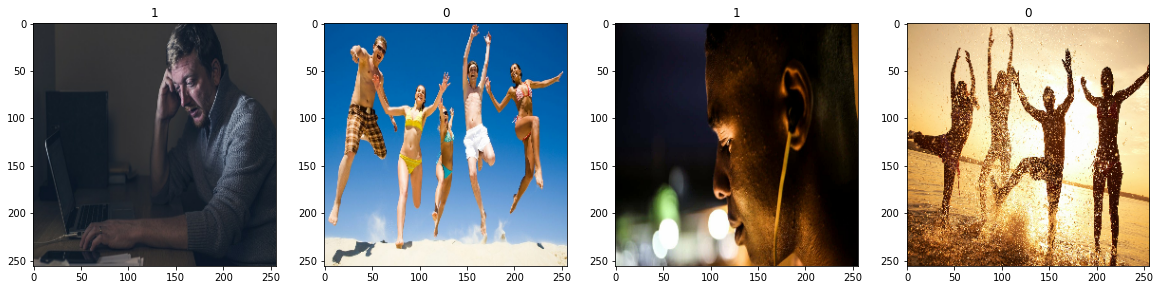

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
# Get another batch from iterator
batch = data_iterator.next()

In [21]:
batch[0].shape

(32, 256, 256, 3)

In [22]:
# Class 1 = sad people
# Class 0 = happy people
batch[1]

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

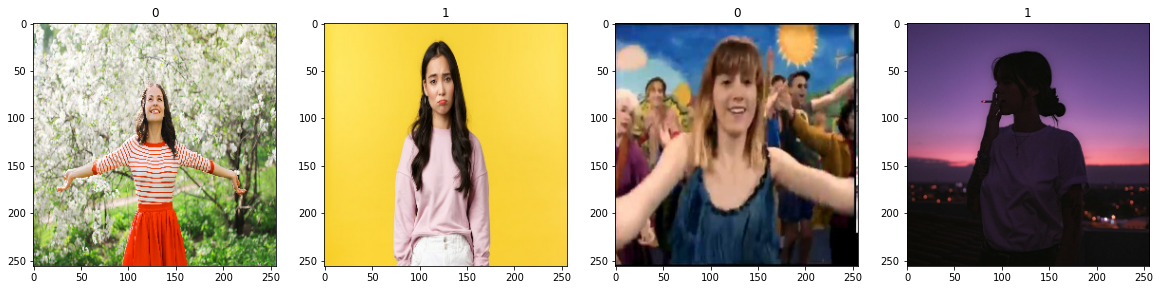

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### 2. Preprocess Data

2.1 Scale Data

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [27]:
data.as_numpy_iterator().next()[0].max(), data.as_numpy_iterator().next()[0].min()

(1.0, 0.0)

2.2 Split Data

In [29]:
len(data) # each batch has 32 images

6

In [31]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

In [32]:
train_size, val_size, test_size

(4, 1, 1)

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(train), len(val), len(test)

(4, 1, 1)

### 3. Deep Model

3.1 Build Deep Learning Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

3.2 Train

In [41]:
logdir = 'logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 17s 2s/step - loss: 0.8571 - accuracy: 0.4609 - val_loss: 0.7247 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.6823 - accuracy: 0.5781 - val_loss: 0.6389 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6318 - accuracy: 0.6094 - val_loss: 0.5678 - val_accuracy: 0.6562
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.5776 - accuracy: 0.6094 - val_loss: 0.5254 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.4942 - accuracy: 0.7969 - val_loss: 0.3000 - val_accuracy: 0.9062
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.3953 - accuracy: 0.8438 - val_loss: 0.2767 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.3045 - accuracy: 0.8750 - val_loss: 0.3426 - val_accuracy: 0.9375
Epoch 8/20
4/4 [========================

3.3 Plot Performance

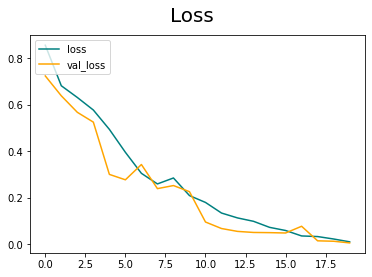

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

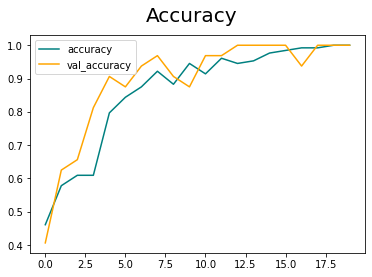

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

#### 4. Evaluate Performance

4.1 Evaluate 

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [50]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


#### 4.2 Test

In [51]:
import cv2

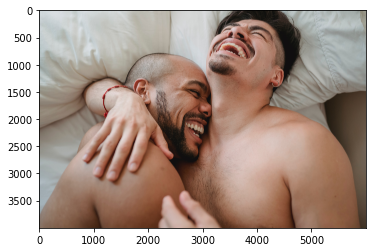

In [53]:
img = cv2.imread('data/happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

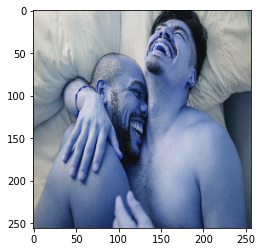

In [56]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [58]:
yhat  # 0: happy, sad: 1

array([[0.995109]], dtype=float32)

In [59]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


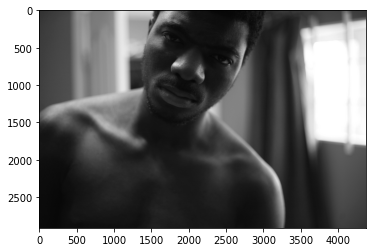

In [60]:
img = cv2.imread('data/sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

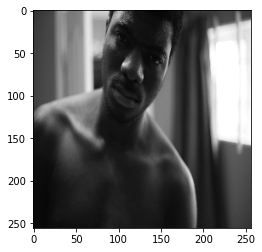

In [61]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [63]:
yhat

array([[0.9984633]], dtype=float32)

In [64]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


#### 5. Save the model

5.1 Save the model

In [65]:
from tensorflow.keras.models import load_model

In [66]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [67]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [68]:
new_model

In [71]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

In [72]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


### The End